In [36]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.optimize import check_grad, line_search, fmin_cg
import movielensutils as tools
import matplotlib.pyplot as plt
import time

In [2]:
filename = 'ml-100k/u.data'
R, mask=tools.load_movielens(filename, minidata=False)
#minidata is to return only first 100 lines and 200 colomns of R and mask

In [3]:
print(R.shape)
print(np.sum(mask))

(943, 1682)
100000


## Question 2.2 

In [17]:
def g_PQ(P,Q):
    
    P=P.reshape(vt.shape)
    return tools.total_objective(P, Q, R, mask, rho)[0]


def grad_P(P,Q):
    
    P=P.reshape(vt.shape)
    return np.ravel(tools.total_objective(P, Q, R, mask, rho)[1])

def grad_Q(Q,P):
    
    Q=Q.reshape(u.shape)
    return np.ravel(tools.total_objective(P, Q, R, mask, rho)[2])

In [115]:
u,s,vt = svds(R,7)
Q=u
P0=vt
P0=np.ravel(P0)
rho=0.2

check_grad(g_PQ, grad_P, P0, Q, epsilon=1e-6)


0.021928157886692275

## Question 2.3

In [9]:
def gradient(g,P0,gamma,epsilon):
    
    P=P0
    grad=tools.objective(P, Q0, R, mask, rho)[1]
    G=list([])
    C=list([])
    while np.sqrt(np.sum(grad**2))>epsilon:
        P=P-gamma*grad
        grad=tools.objective(P, Q0, R, mask, rho)[1]
        G.append(np.sqrt(np.sum(grad**2)))
        C.append(tools.objective(P, Q0, R, mask, rho)[0])
        
    return P,G,C

## Question 2.4

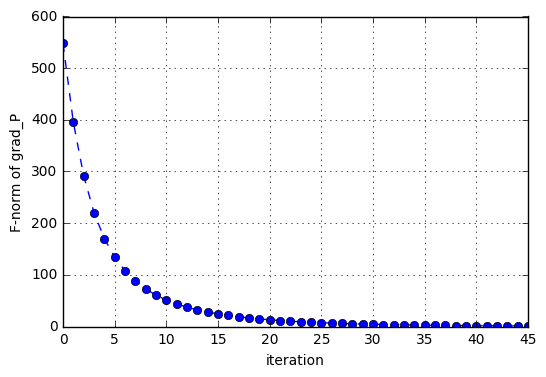

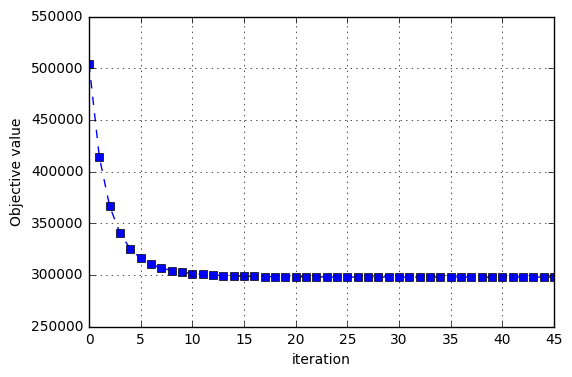

In [93]:
u,s,vt = svds(R,7)
Q0=u
P0=vt
rho=0.2

L0=np.sqrt(np.sum(np.transpose(Q0).dot(Q0)))+rho
gamma=1/L0
P_opt,G,C=gradient(0,P0,gamma,1)
#print(R)
#print(Q0.dot(P_opt))
plt.figure()
plt.plot(G,linestyle='--',marker='o')
plt.xlabel('iteration')
plt.ylabel('F-norm of grad_P')
plt.grid()
plt.figure()
plt.plot(C,linestyle='--',marker='s')
plt.xlabel('iteration')
plt.ylabel('Objective value')
plt.grid()
plt.show()

## Question 3.1

In [15]:
def linesearch_gradient(P0,epsilon):
    P=P0
    grad=tools.objective(P, Q, R, mask, rho)[1]
    G=list([])
    C=list([])
    while np.sqrt(np.sum(grad**2))>epsilon:
        gamma=line_search(g_PQ, grad_P, np.ravel(P), -grad_P(np.ravel(P),Q), 	args=(Q,))[0]
        P=P-gamma*grad
        grad=tools.objective(P, Q, R, mask, rho)[1]
        G.append(np.sqrt(np.sum(grad**2)))
        C.append(tools.objective(P, Q, R, mask, rho)[0])
    return P,G,C 

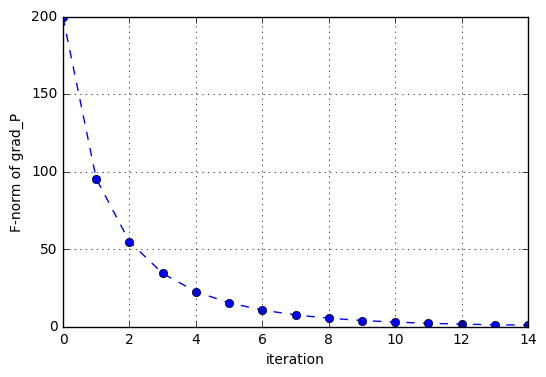

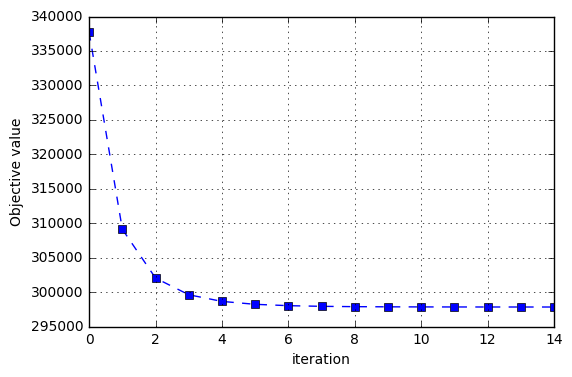

In [88]:
u,s,vt = svds(R,7)
Q=u
P0=vt
rho=0.2

P_opt,G,C=linesearch_gradient(P0,1)

#print(R)
#print(Q0.dot(P_opt))
plt.figure()
plt.plot(G,linestyle='--',marker='o')
plt.xlabel('iteration')
plt.ylabel('F-norm of grad_P')
plt.grid()
plt.figure()
plt.plot(C,linestyle='--',marker='s')
plt.xlabel('iteration')
plt.ylabel('Objective value')
plt.grid()
plt.show()

In [94]:
C[-1]

297828.94651068537

## Question 3.2

In [22]:
def conj_gradient(P,Q,epsilon):
    grad=tools.total_objective(P, Q, R, mask, rho)[1]
    d=-grad
    G=list([])
    C=list([])
    while np.sqrt(np.sum(grad**2))>epsilon:
        gamma=line_search(g_PQ, grad_P, np.ravel(P), -grad_P(np.ravel(P),Q), args=(Q,))[0]
        P=P+gamma*d
        grad_old=grad
        grad=tools.total_objective(P, Q, R, mask, rho)[1]
        b=np.sum(grad**2)/np.sum(grad_old**2)
        d=-grad+b*d
        G.append(np.sqrt(np.sum(grad**2)))
        C.append(tools.objective(P, Q, R, mask, rho)[0])
    return P,G,C

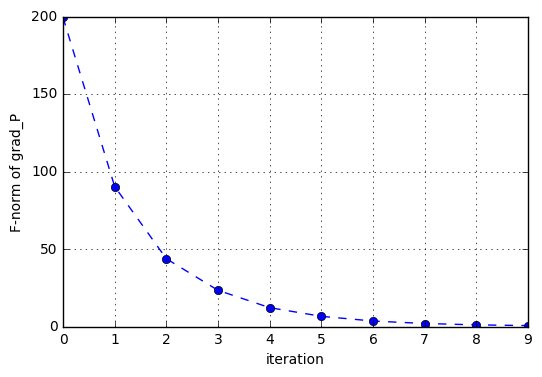

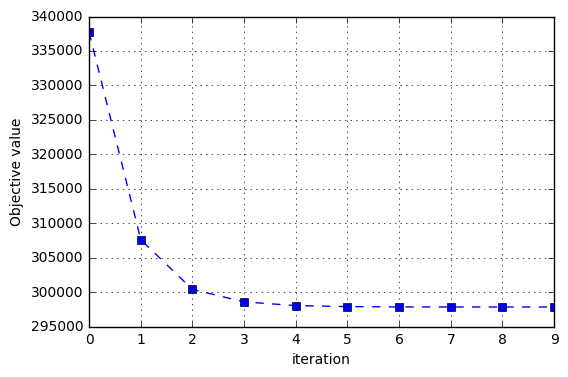

In [90]:
u,s,vt = svds(R,7)
Q=u
P0=vt
P_opt,G,C=conj_gradient(P0,Q,1)
plt.figure()
plt.plot(G,linestyle='--',marker='o')
plt.xlabel('iteration')
plt.ylabel('F-norm of grad_P')
plt.grid()
plt.figure()
plt.plot(C,linestyle='--',marker='s')
plt.xlabel('iteration')
plt.ylabel('Objective value')
plt.grid()
plt.show()

## Question 4.1

In [26]:
def g_PQvec(PQvec):
    return tools.total_objective_vectorized(PQvec, R, mask, rho)[0]

def grad_PQ(PQvec):
    return tools.total_objective_vectorized(PQvec, R, mask, rho)[1]

def linesearch_gradient_PQ(P0, Q0, epsilon):
    PQvec=np.concatenate([P0.ravel(), Q0.ravel()])
    grad=grad_PQ(PQvec)
    G=list([])
    C=list([])
    while np.sqrt(np.sum(grad**2))>epsilon:
        gamma=line_search(g_PQvec, grad_PQ, PQvec, -grad_PQ(PQvec) )[0]
        PQvec=PQvec-gamma*grad
        grad=grad_PQ(PQvec)
        G.append(np.sqrt(np.sum(grad**2)))
        C.append(tools.total_objective_vectorized(PQvec, R, mask, rho)[0])
    return PQvec,G,C 


In [35]:
len(C)

118

C:\Users\Win7-Wei\Desktop\travaux pratiques\SD211 TP1\movielensutils.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Pvec = PQvec[0:n_items*F]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD211 TP1\movielensutils.py:95: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Qvec = PQvec[n_items*F:]
c:\program files\python35\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


it costs: 195.42757558822632


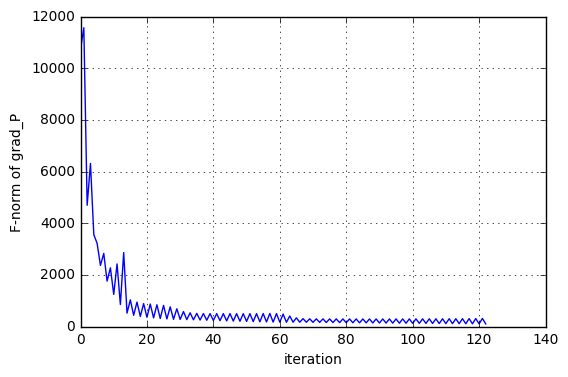

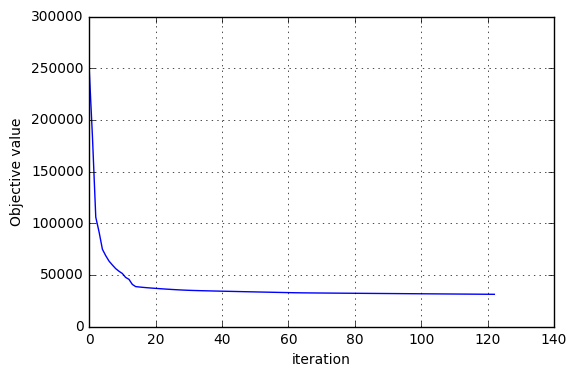

In [37]:
u,s,vt = svds(R,7)
Q0=u
P0=vt
rho=0.2

begin=time.time()
PQ_opt,G,C=linesearch_gradient_PQ(P0,Q0,100)
print('it costs:',time.time()-begin)

#print(R)
#print(Q0.dot(P_opt))
plt.figure()
plt.plot(G)
plt.xlabel('iteration')
plt.ylabel('F-norm of grad_P')
plt.grid()
plt.figure()
plt.plot(C)
plt.xlabel('iteration')
plt.ylabel('Objective value')
plt.grid()
plt.show()


In [85]:
PQ_opt=PQvec2

In [77]:
PQvec2=PQ_opt

In [78]:
np.sum((PQvec1-PQvec2)**2)/PQvec1.shape[0]

2.0661286373430134

In [83]:
P_opt=PQ_opt[:P.shape[0]*P.shape[1]].reshape(P.shape)
Q_opt=PQ_opt[P.shape[0]*P.shape[1]:].reshape(Q.shape)
R_est2=Q_opt.dot(P_opt)

In [84]:
np.sum((R_est1-R_est2)**2)/R_est1.shape[0]/R_est1.shape[1]

1.3666050449740101

In [76]:
len(C)

110

## Question 4.3

175384.809353
85163.3175528
66824.2120898
60092.1997575
55617.7888133
52212.9587185
49475.6834293
47215.5872067
45321.1606656
43717.1933344
42346.6652659
41165.2572361
40138.4503177
39240.0389971
38450.0346475
37751.9916976
37132.0332125
36578.3293882
36081.0835971
35632.2813538
35225.3398036
34854.8482192
34516.3126187
34205.9089053
33920.3443285
33656.8030325
33412.9219554
33186.7057117
32976.3024796
32780.0809347
32597.4864595
32427.8465057
32269.8176972
32122.1942772
31983.9836558
31854.3451788
31732.5463013
31617.9387936
31509.9452743
31408.048801
31311.7817681
31220.7152407
31134.4533387
31052.6357261
30974.9445158
30901.1013091
30830.8479191
30763.9324703
30700.1111081
30639.1560504
30580.8780081
30525.1515083
30471.8740045
30420.9133734
30372.1260207
30325.3792504
30280.5549353
30237.5476476
30196.2622594
30156.6117026
30118.5150251
30081.89589
30046.6815939
30012.8025379
29980.1920067
29948.7861194
29918.5238563
29889.3471072
29861.2007076
29834.032443
29807.7930057
29782.4359

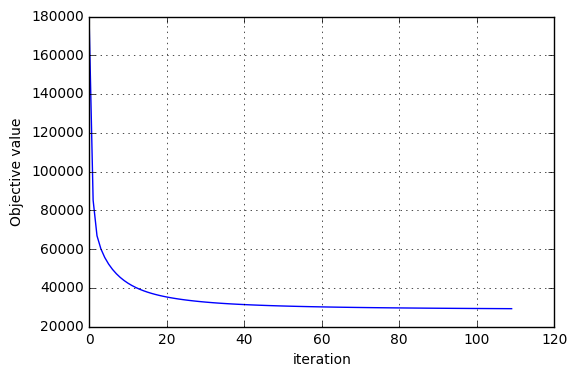

In [75]:
u,s,vt = svds(R,7)
Q=u
P=vt

C=list([])
epsilon=100
rho=0.2
k=0
begin=time.time()
while k<2 or np.abs(C[-1]-C[-2])>10:
    for i in range(P.shape[1]):
        P[:,i]=np.linalg.inv (Q.T.dot( np.diag(mask[:,i]) ).dot(Q)+rho*np.eye(Q.shape[1])).dot(Q.T).dot(R[:,i].dot(np.diag(mask[:,i])))
    for u in range(Q.shape[0]):
        Q[u,:]=R[u,:].dot(np.diag(mask[u,:])).dot(P.T).dot(np.linalg.inv(P.dot(  np.diag(mask[u,:])  ).dot(P.T)+rho*np.eye(P.shape[0])))
    C.append(tools.total_objective(P, Q, R, mask, rho)[0])
    k=k+1
    print(C[-1])
print('it costs:',time.time()-begin)

PQ_opt=np.concatenate([P.ravel(), Q.ravel()])    
plt.plot(C)
plt.xlabel('iteration')
plt.ylabel('Objective value')
plt.grid()
plt.show()

## Question 4.5

In [57]:
R, mask=tools.load_movielens(filename, minidata=False)
u,s,vt = svds(R,7)
Q0=u
P0=vt
rho=0.2
print('initialisation finished')
PQ_opt,G=linesearch_gradient(P0,Q0,100)
print('optimisation finished')

P_opt=PQ_opt[:P0.shape[0]*P0.shape[1]].reshape(P0.shape)
Q_opt=PQ_opt[P0.shape[0]*P0.shape[1]:].reshape(Q0.shape)
R_est=Q_opt.dot(P_opt)
print(np.argmax(R_est[449,:]*(1-mask)[449,:]))
print(np.max(R_est[449,:]))

plt.figure(figsize=(15,6))
plt.bar(range(R.shape[1]),R_est[449,:]*(1-mask)[449,:])
plt.xlabel('Film')
plt.ylabel('Rate of user 449')
plt.grid()
plt.show()

initialisation finished


C:\Users\Win7-Wei\Desktop\travaux pratiques\SD211 TP1\movielensutils.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Pvec = PQvec[0:n_items*F]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD211 TP1\movielensutils.py:95: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Qvec = PQvec[n_items*F:]
c:\program files\python35\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


optimisation finished


ValueError: total size of new array must be unchanged

[[ 5.  3.  4. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]]
542
7.34322875891


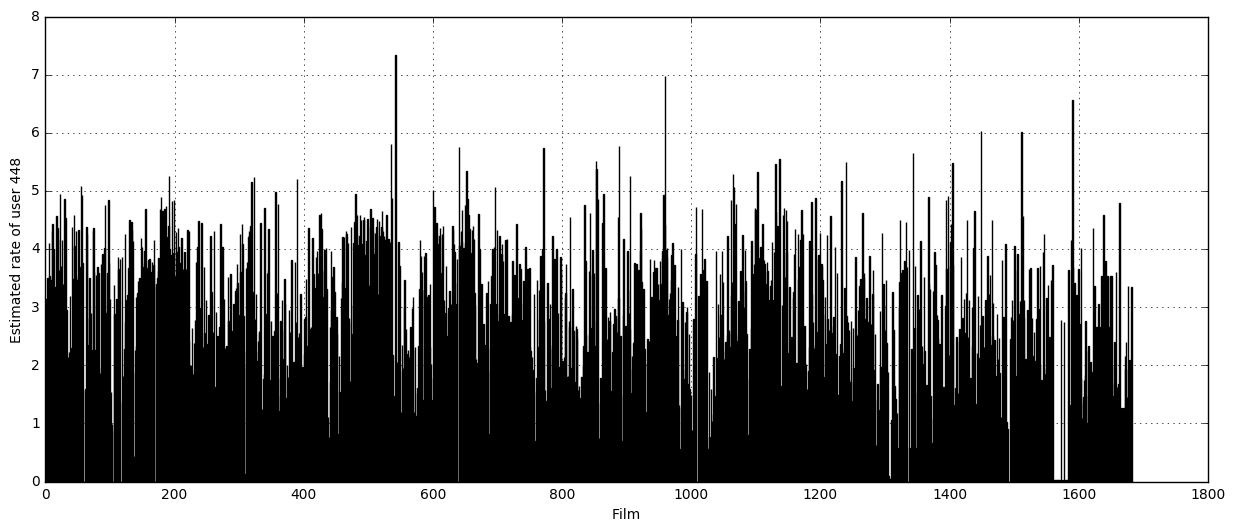

In [87]:
P_opt=PQ_opt[:P.shape[0]*P.shape[1]].reshape(P.shape)
Q_opt=PQ_opt[P.shape[0]*P.shape[1]:].reshape(Q.shape)
R_est=Q_opt.dot(P_opt)
print(R)
print(np.argmax(R_est[448,:]*(1-mask)[448,:]))
print(np.max(R_est[448,:]*(1-mask)[448,:]))

plt.figure(figsize=(15,6))
plt.bar(range(R.shape[1]),R_est[448,:]*(1-mask)[448,:])
plt.xlabel('Film')
plt.ylabel('Estimated rate of user 448')
plt.ylim([0,8])
plt.grid()
plt.show()

58


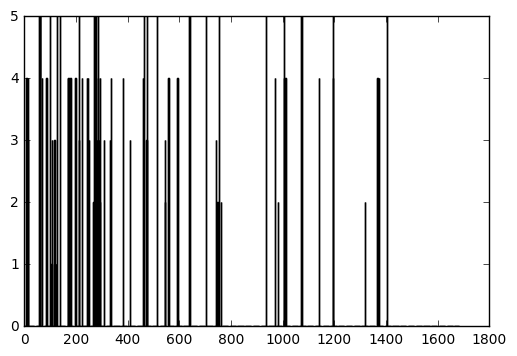

In [61]:
print(np.argmax(R[448,:]))
plt.bar(range(R.shape[1]),R[448,:])
plt.show()